# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [4]:
# EXPECTED OUTPUT
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [8]:
# EXPECTED OUTPUT

**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [9]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [10]:
# EXPECTED OUTPUT

# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# EXPECTED OUTPUT

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

In [13]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

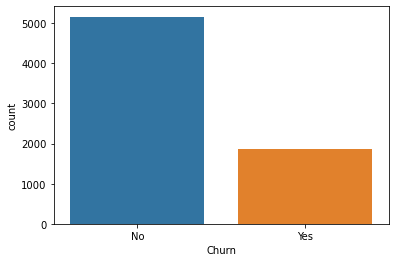

In [14]:
# check for balance labels
sns.countplot(data=df, x='Churn')

## the plot shows that our label is kind of imbalanced labels -> therefore, accuracy won't appropriate the evaluate the model

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

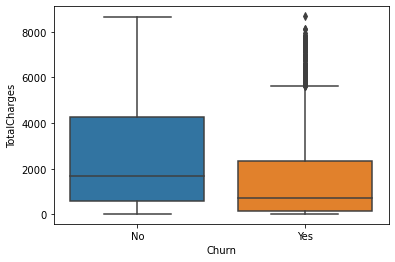

In [16]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

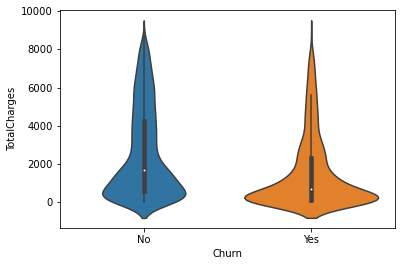

In [17]:
sns.violinplot(data=df, x='Churn', y='TotalCharges')

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

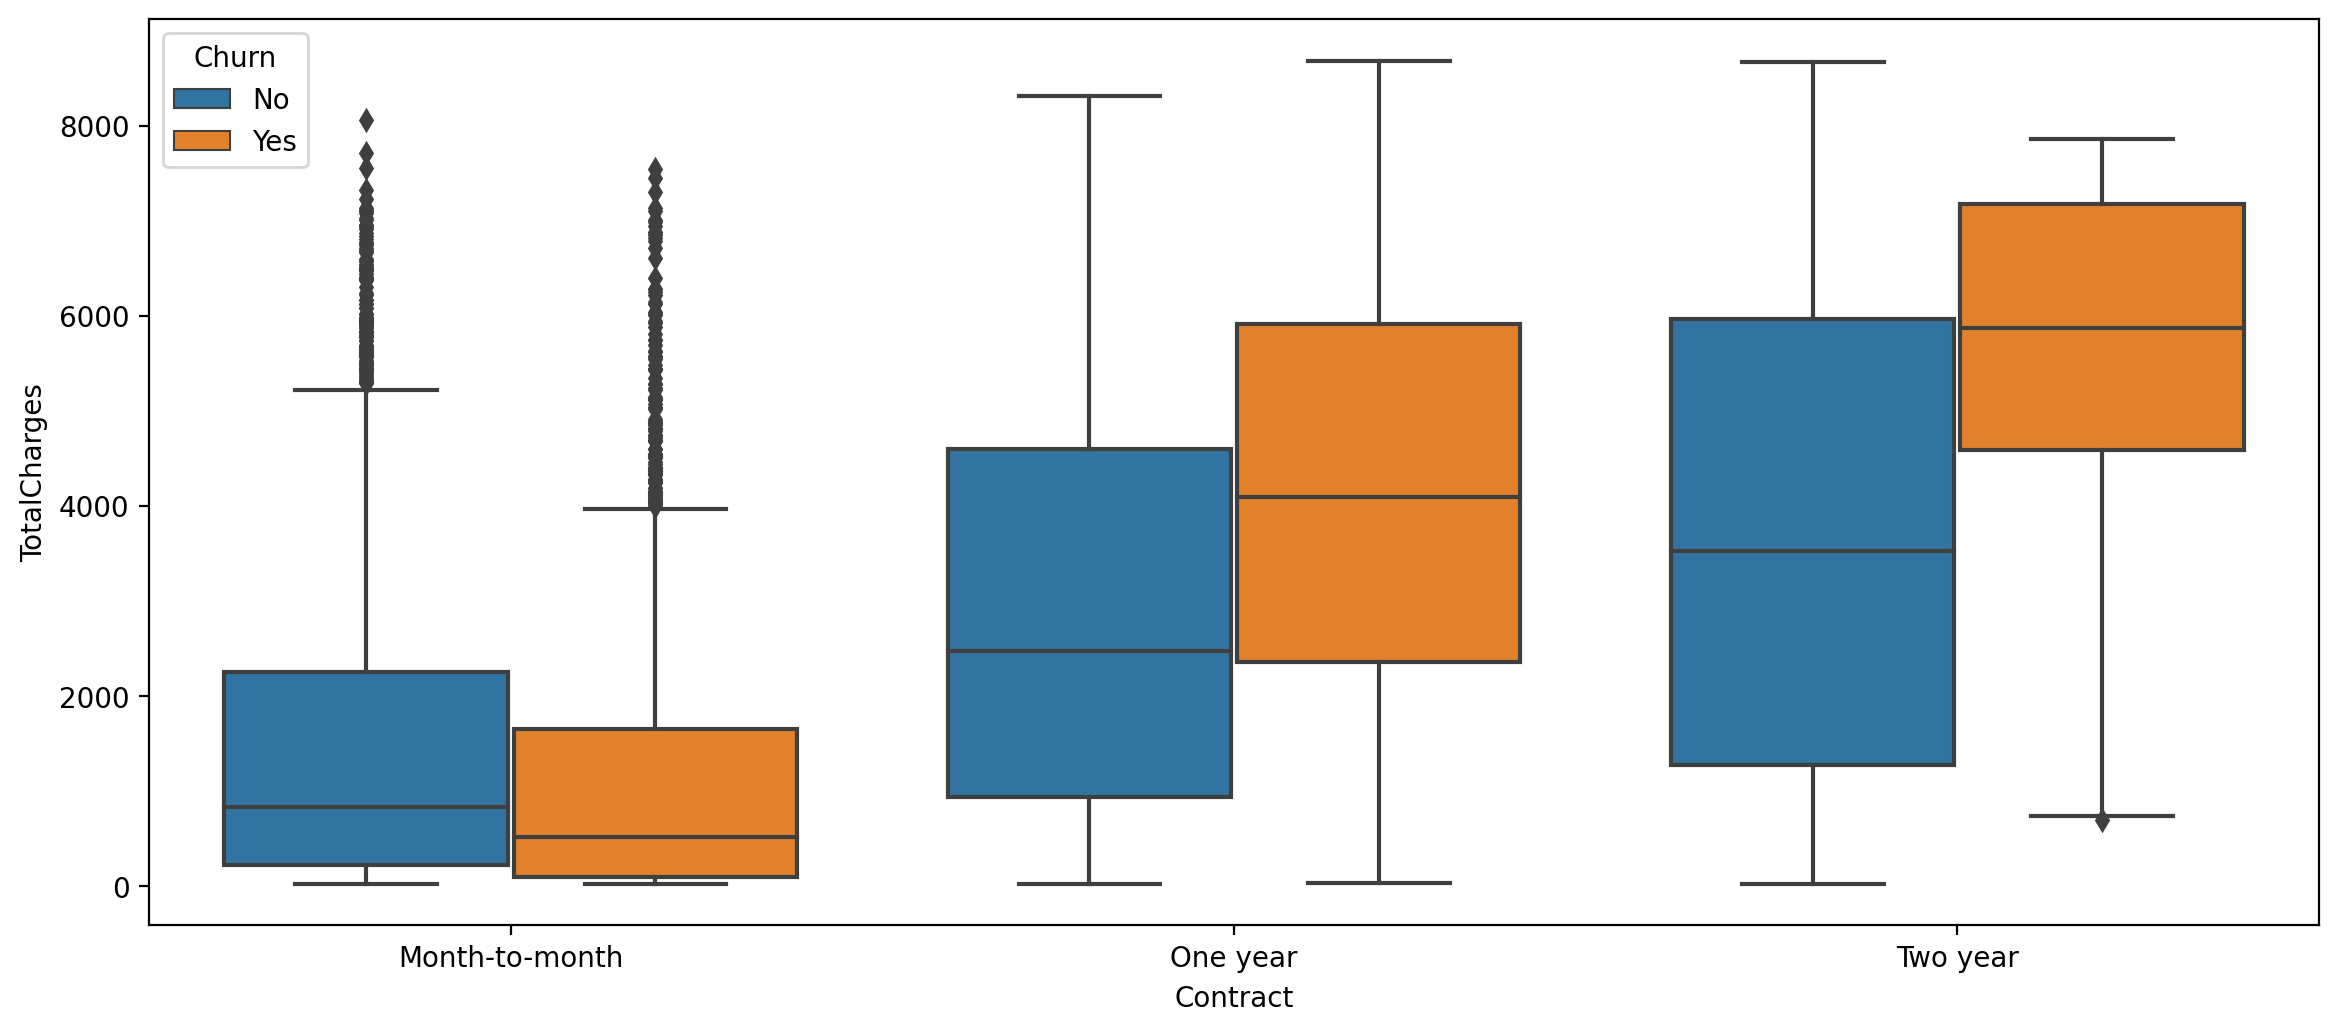

In [19]:
plt.figure(figsize=(14,6), dpi=200)
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')

# looks like people with more charges tend to Churn after few year of contract

## Solution: maybe provide some coupon for them to get the money from them in a longrun.

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [21]:
df.head(2)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   

      PaymentMethod MonthlyCharges  TotalCharges  Churn  
0  Electronic check          29.85         29.85     No  
1      Mailed check          56.95       1889.50     No  

[2 rows x 21 columns]

In [22]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
corr_df = pd.get_dummies(data=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [24]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

## grab the features which correlated to "YES" churn
## becuase, we trying to findout what makes people Churn our service.

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

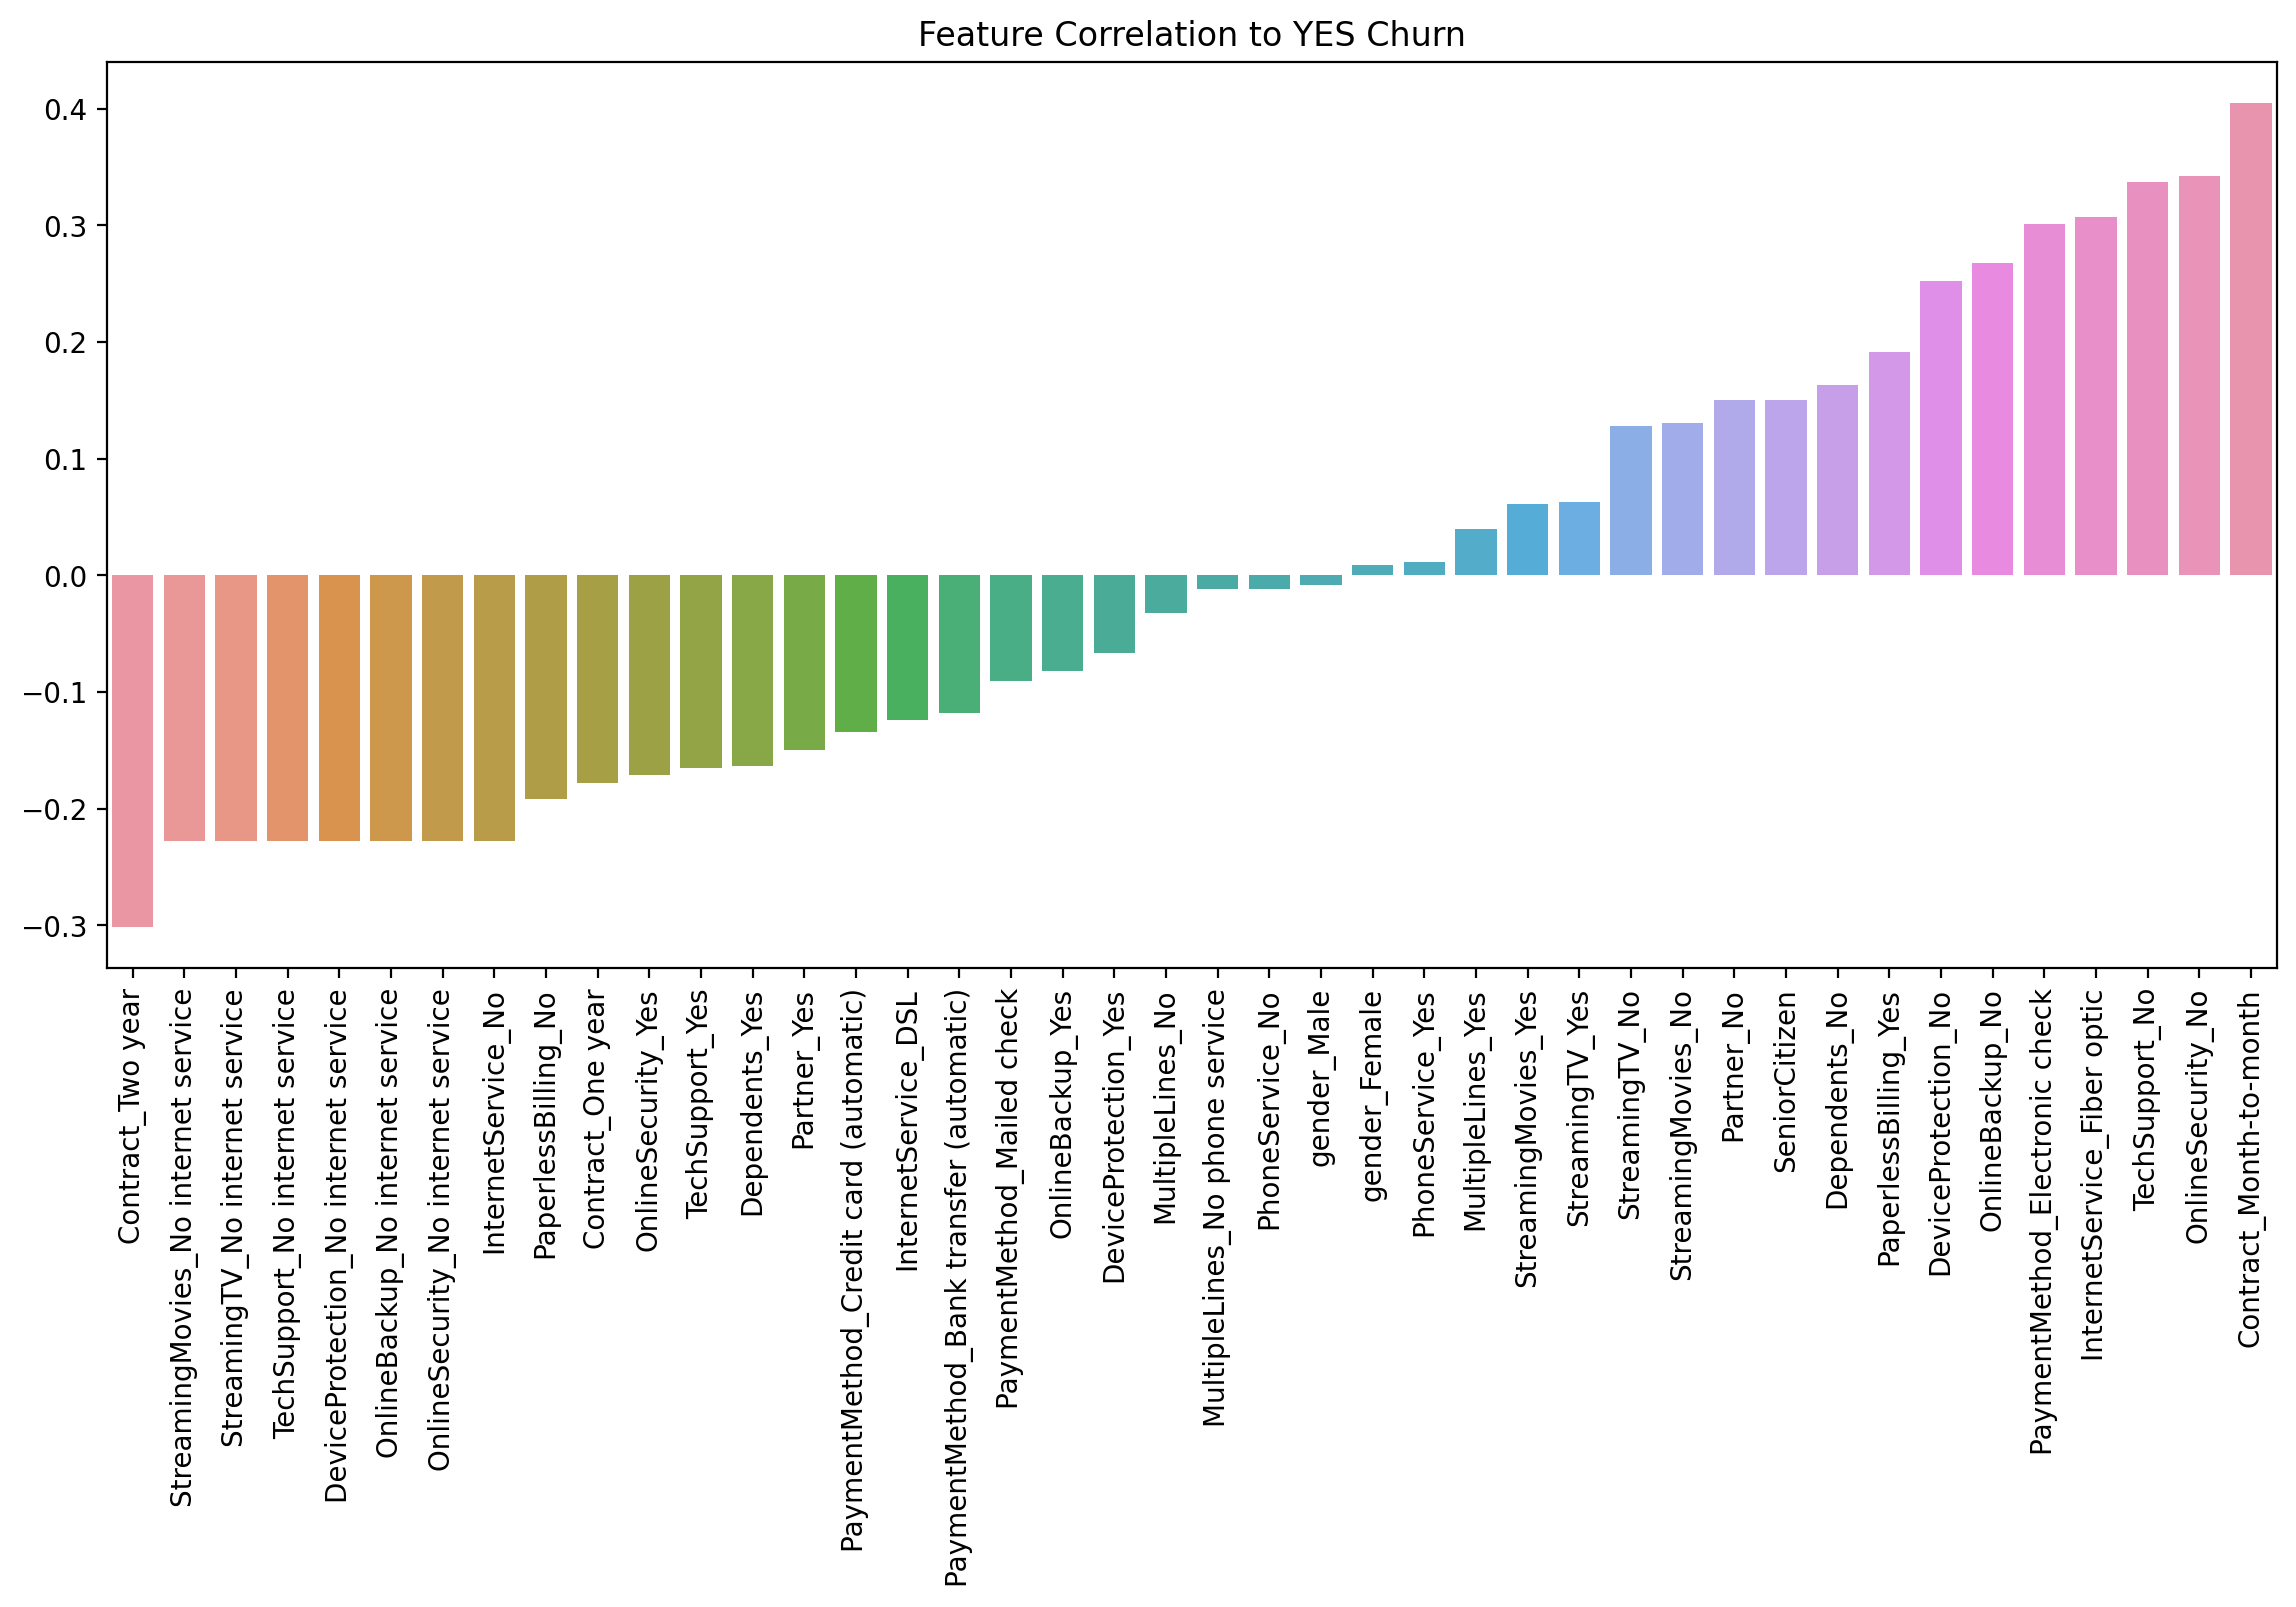

In [106]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index, y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to YES Churn")
plt.xticks(rotation=90);


## Visualized it for better/easier understanding.

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [28]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [29]:
# EXPECTED OUTPUT

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

In [30]:
#CODE HERE

In [31]:
df[['tenure']]

tenure
0          1
1         34
2          2
3         45
4          2
...      ...
7027      24
7028      72
7029      11
7030       4
7031      66

[7032 rows x 1 columns]

In [32]:
tenure_count = df['tenure'].value_counts()
tenure_count

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

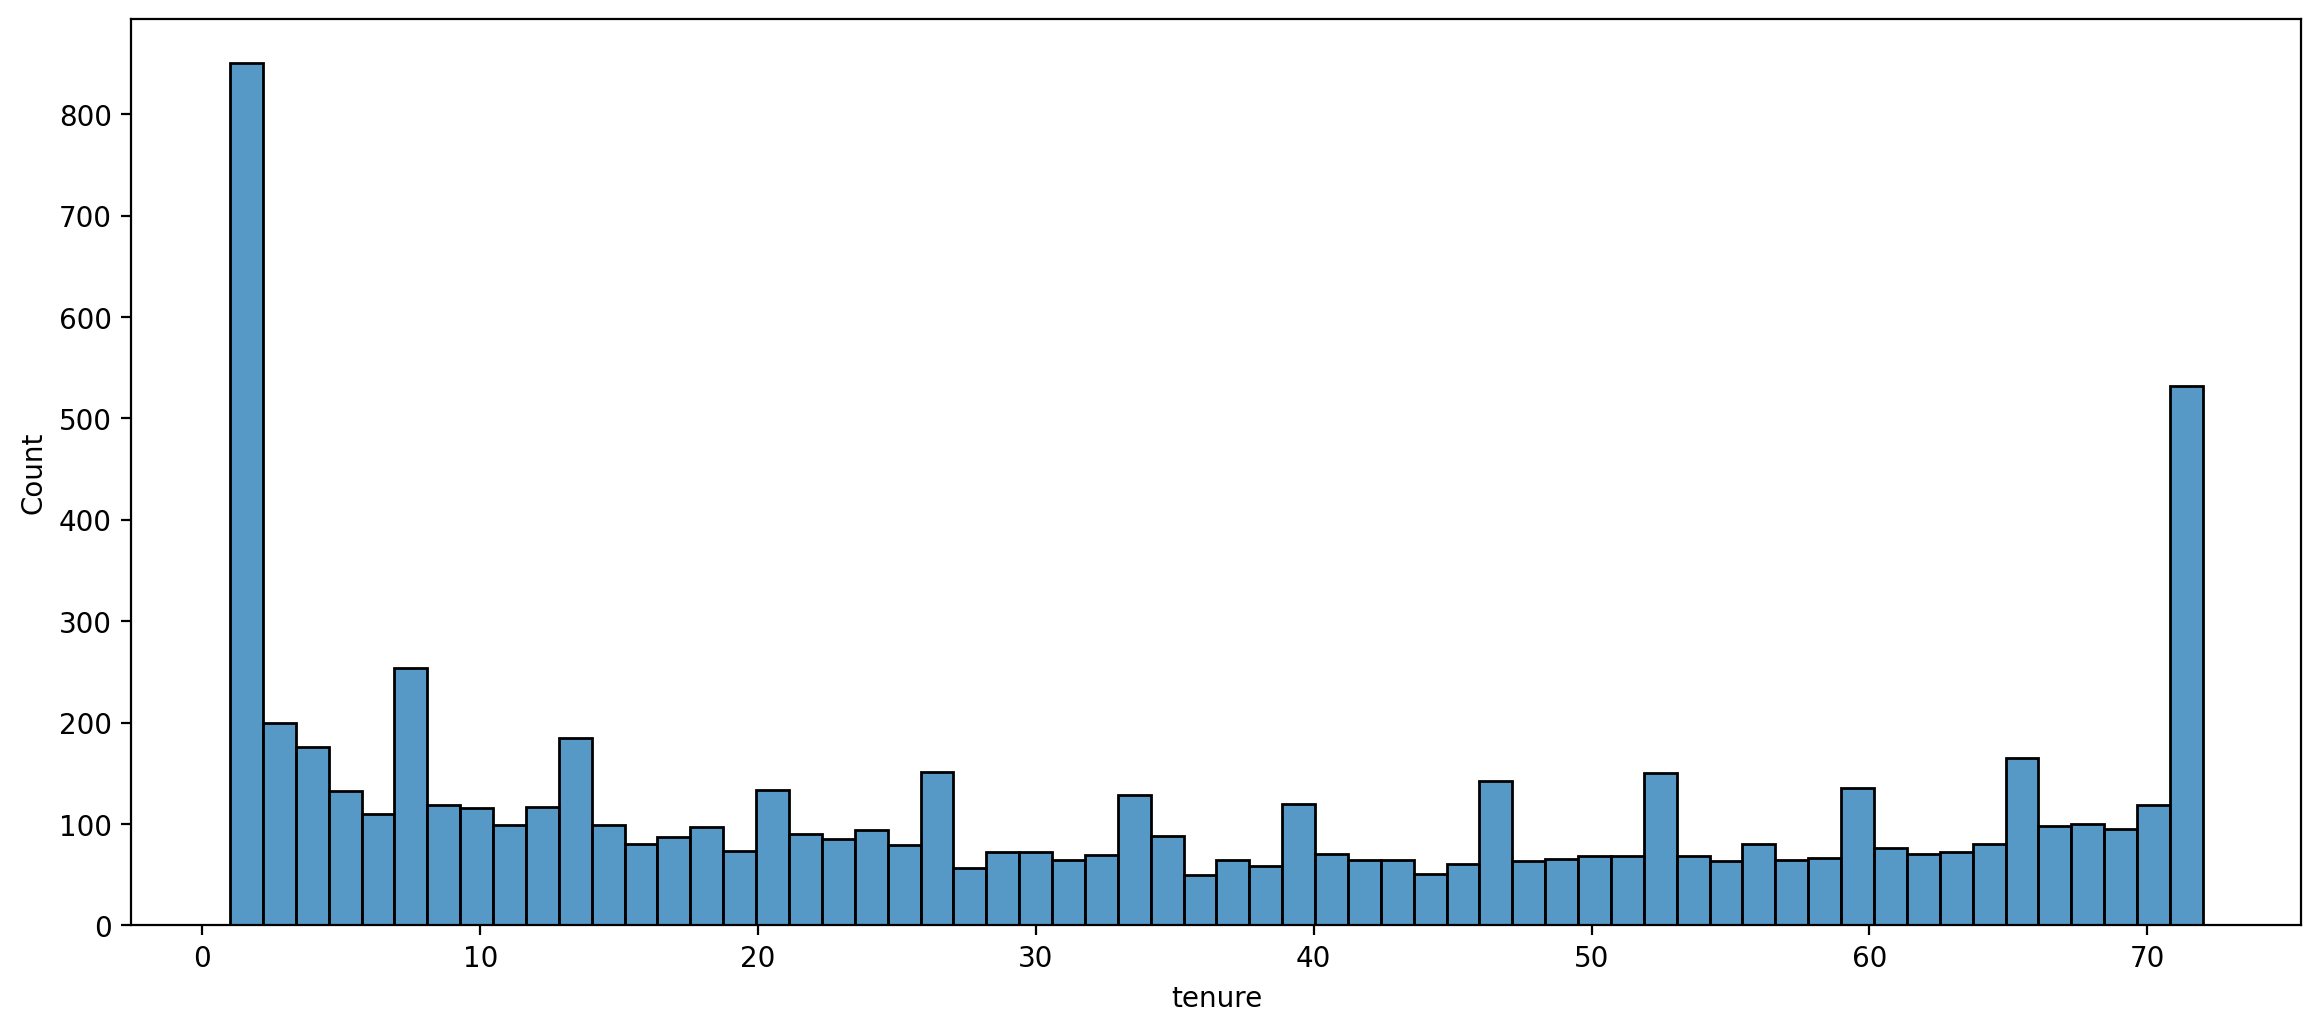

In [33]:
plt.figure(figsize=(14,6), dpi=200)
sns.histplot(data=df, x='tenure', bins=60)

## as we can see, there are bunches of customer stay in a short term
# how to solve this problem ?

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

<Figure size 2800x1200 with 0 Axes>

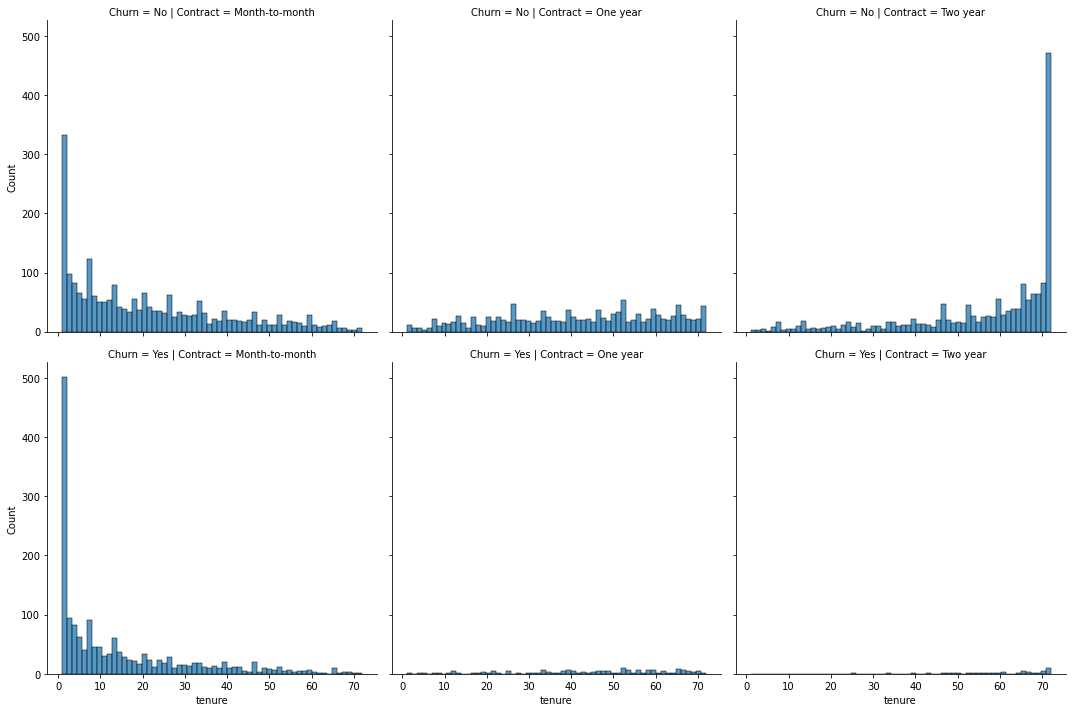

In [108]:
plt.figure(figsize=(14,6), dpi=200)
sns.displot(data=df, x='tenure', col='Contract', row='Churn', bins=60)

## there are some customers with long tenure (30++ months) but still Churn
# maybe we have to think of promotion to decrease his/her overall billing
# to make them not Churn.

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

In [37]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

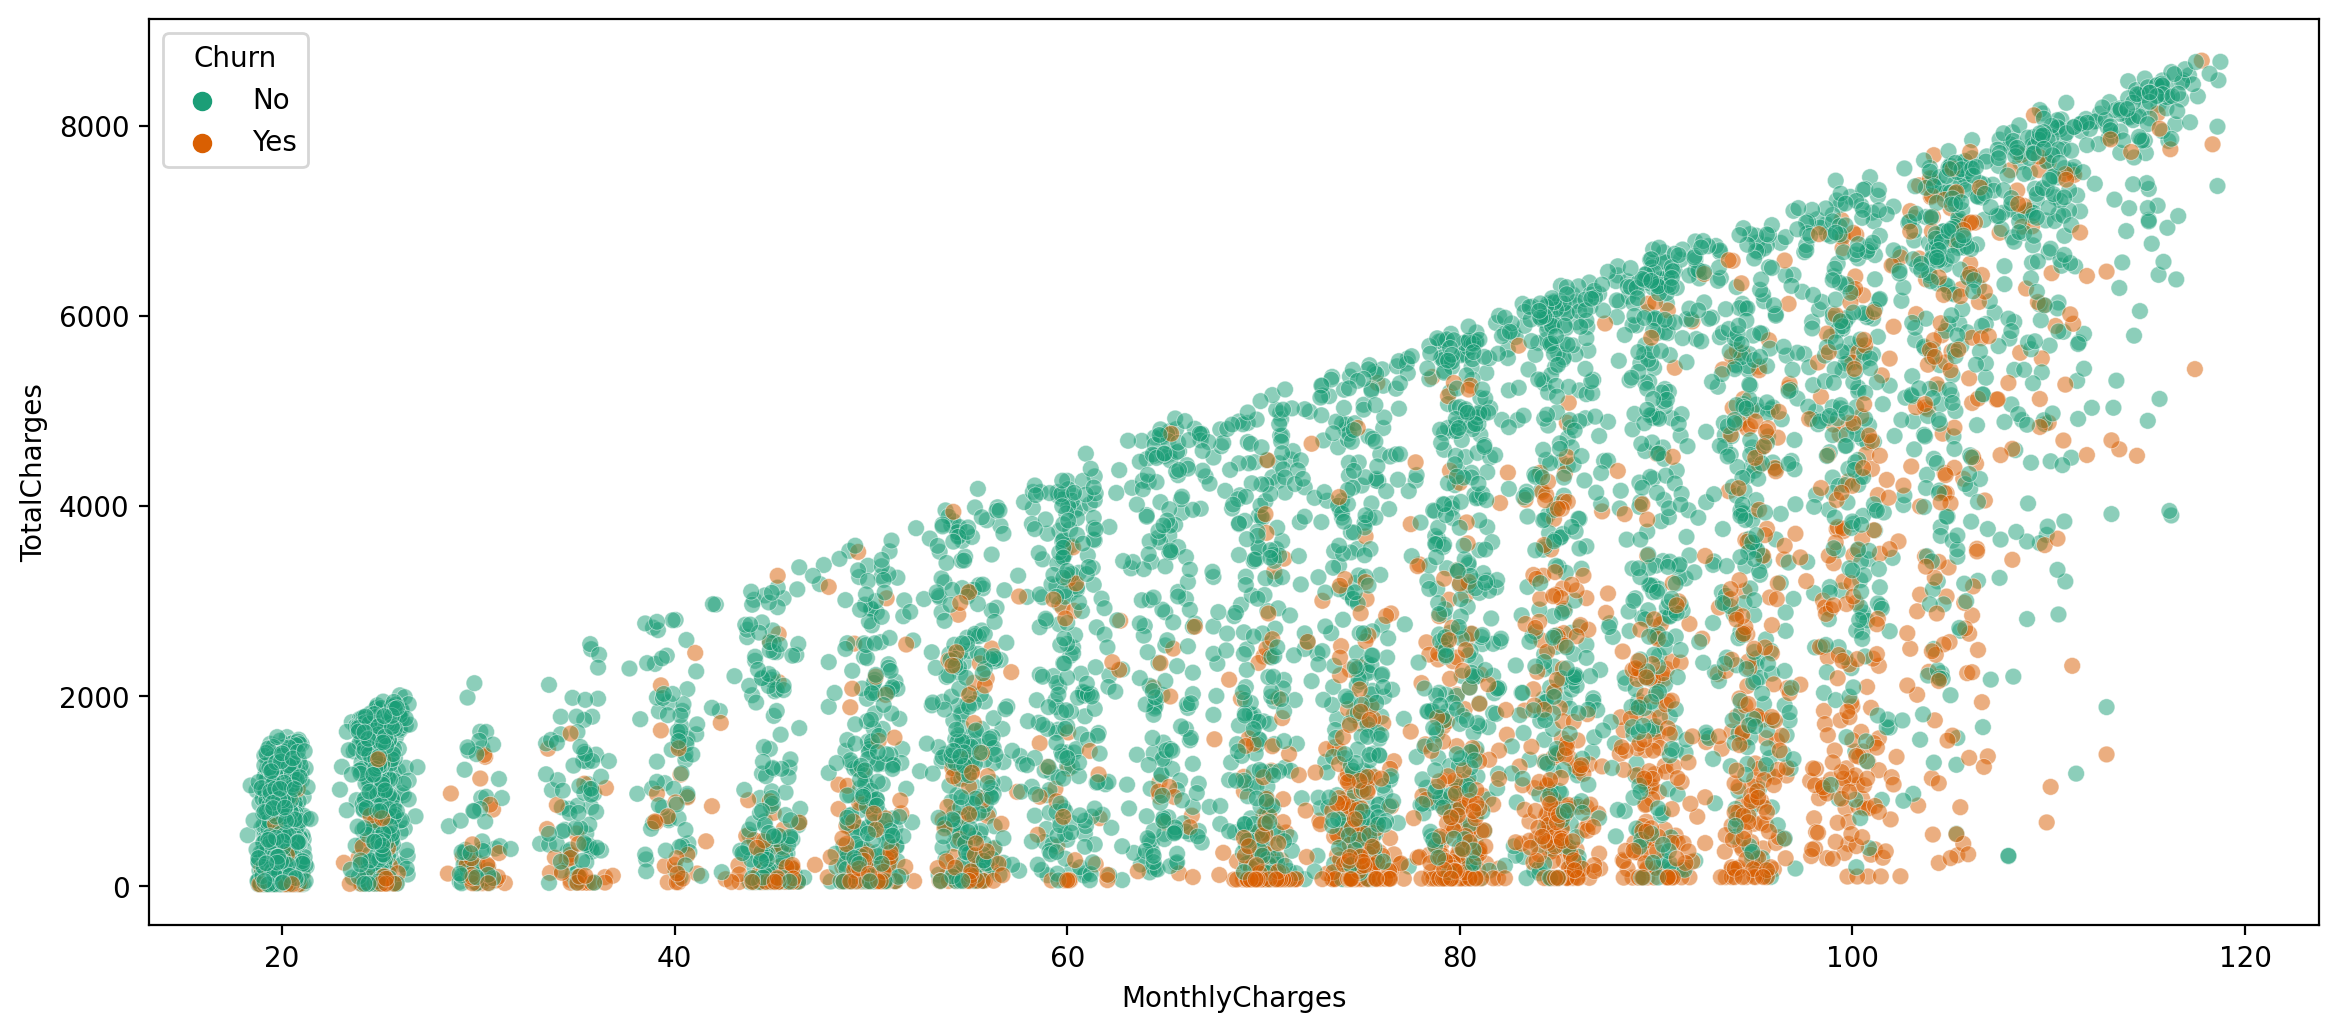

In [38]:
plt.figure(figsize=(14,6), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='Dark2', alpha=0.5, linewidth=0.3)

# as we con see customer with paying large ammount per month causing them to Churn

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [40]:
np.sort(df['tenure'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72], dtype=int64)

In [41]:
df[['tenure', 'Churn']].head()

tenure Churn
0       1    No
1      34    No
2       2   Yes
3      45    No
4       2   Yes

In [42]:
df.groupby(['Churn','tenure']).count().transpose()

Churn              No                                        ... Yes        \
tenure             1    2    3   4   5   6   7   8   9   10  ...  63 64 65   
customerID        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
gender            233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
SeniorCitizen     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Partner           233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Dependents        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PhoneService      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MultipleLines     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
InternetService   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineSecurity    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineBackup      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
DeviceProtection  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TechSupport       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingTV       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingMovies   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Contract          233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaperlessBilling  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaymentMethod     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MonthlyCharges    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TotalCharges      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   

Churn                                     
tenure            66  67 68 69  70 71 72  
customerID        13  10  9  8  11  6  6  
gender            13  10  9  8  11  6  6  
SeniorCitizen     13  10  9  8  11  6  6  
Partner           13  10  9  8  11  6  6  
Dependents        13  10  9  8  11  6  6  
PhoneService      13  10  9  8  11  6  6  
MultipleLines     13  10  9  8  11  6  6  
InternetService   13  10  9  8  11  6  6  
OnlineSecurity    13  10  9  8  11  6  6  
OnlineBackup      13  10  9  8  11  6  6  
DeviceProtection  13  10  9  8  11  6  6  
TechSupport       13  10  9  8  11  6  6  
StreamingTV       13  10  9  8  11  6  6  
StreamingMovies   13  10  9  8  11  6  6  
Contract          13  10  9  8  11  6  6  
PaperlessBilling  13  10  9  8  11  6  6  
PaymentMethod     13  10  9  8  11  6  6  
MonthlyCharges    13  10  9  8  11  6  6  
TotalCharges      13  10  9  8  11  6  6  

[19 rows x 144 columns]

In [43]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
no_churn

tenure             1    2    3   4   5   6   7   8   9   10  ...  63  64  65  \
customerID        233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
gender            233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
SeniorCitizen     233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
Partner           233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
Dependents        233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
PhoneService      233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
MultipleLines     233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
InternetService   233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
OnlineSecurity    233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
OnlineBackup      233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
DeviceProtection  233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
TechSupport       233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
StreamingTV       233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
StreamingMovies   233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
Contract          233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
PaperlessBilling  233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
PaymentMethod     233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
MonthlyCharges    233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
TotalCharges      233  115  106  93  69  70  80  81  73  71  ...  68  76  67   

tenure            66  67  68  69   70   71   72  
customerID        76  88  91  87  108  164  356  
gender            76  88  91  87  108  164  356  
SeniorCitizen     76  88  91  87  108  164  356  
Partner           76  88  91  87  108  164  356  
Dependents        76  88  91  87  108  164  356  
PhoneService      76  88  91  87  108  164  356  
MultipleLines     76  88  91  87  108  164  356  
InternetService   76  88  91  87  108  164  356  
OnlineSecurity    76  88  91  87  108  164  356  
OnlineBackup      76  88  91  87  108  164  356  
DeviceProtection  76  88  91  87  108  164  356  
TechSupport       76  88  91  87  108  164  356  
StreamingTV       76  88  91  87  108  164  356  
StreamingMovies   76  88  91  87  108  164  356  
Contract          76  88  91  87  108  164  356  
PaperlessBilling  76  88  91  87  108  164  356  
PaymentMethod     76  88  91  87  108  164  356  
MonthlyCharges    76  88  91  87  108  164  356  
TotalCharges      76  88  91  87  108  164  356  

[19 rows x 72 columns]

In [44]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [45]:
churn_rate = (yes_churn / (no_churn+yes_churn)*100).transpose()['customerID']
churn_rate

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

In [46]:
# EXPECTED OUTPUT

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

Text(0, 0.5, 'Churn Percentage')

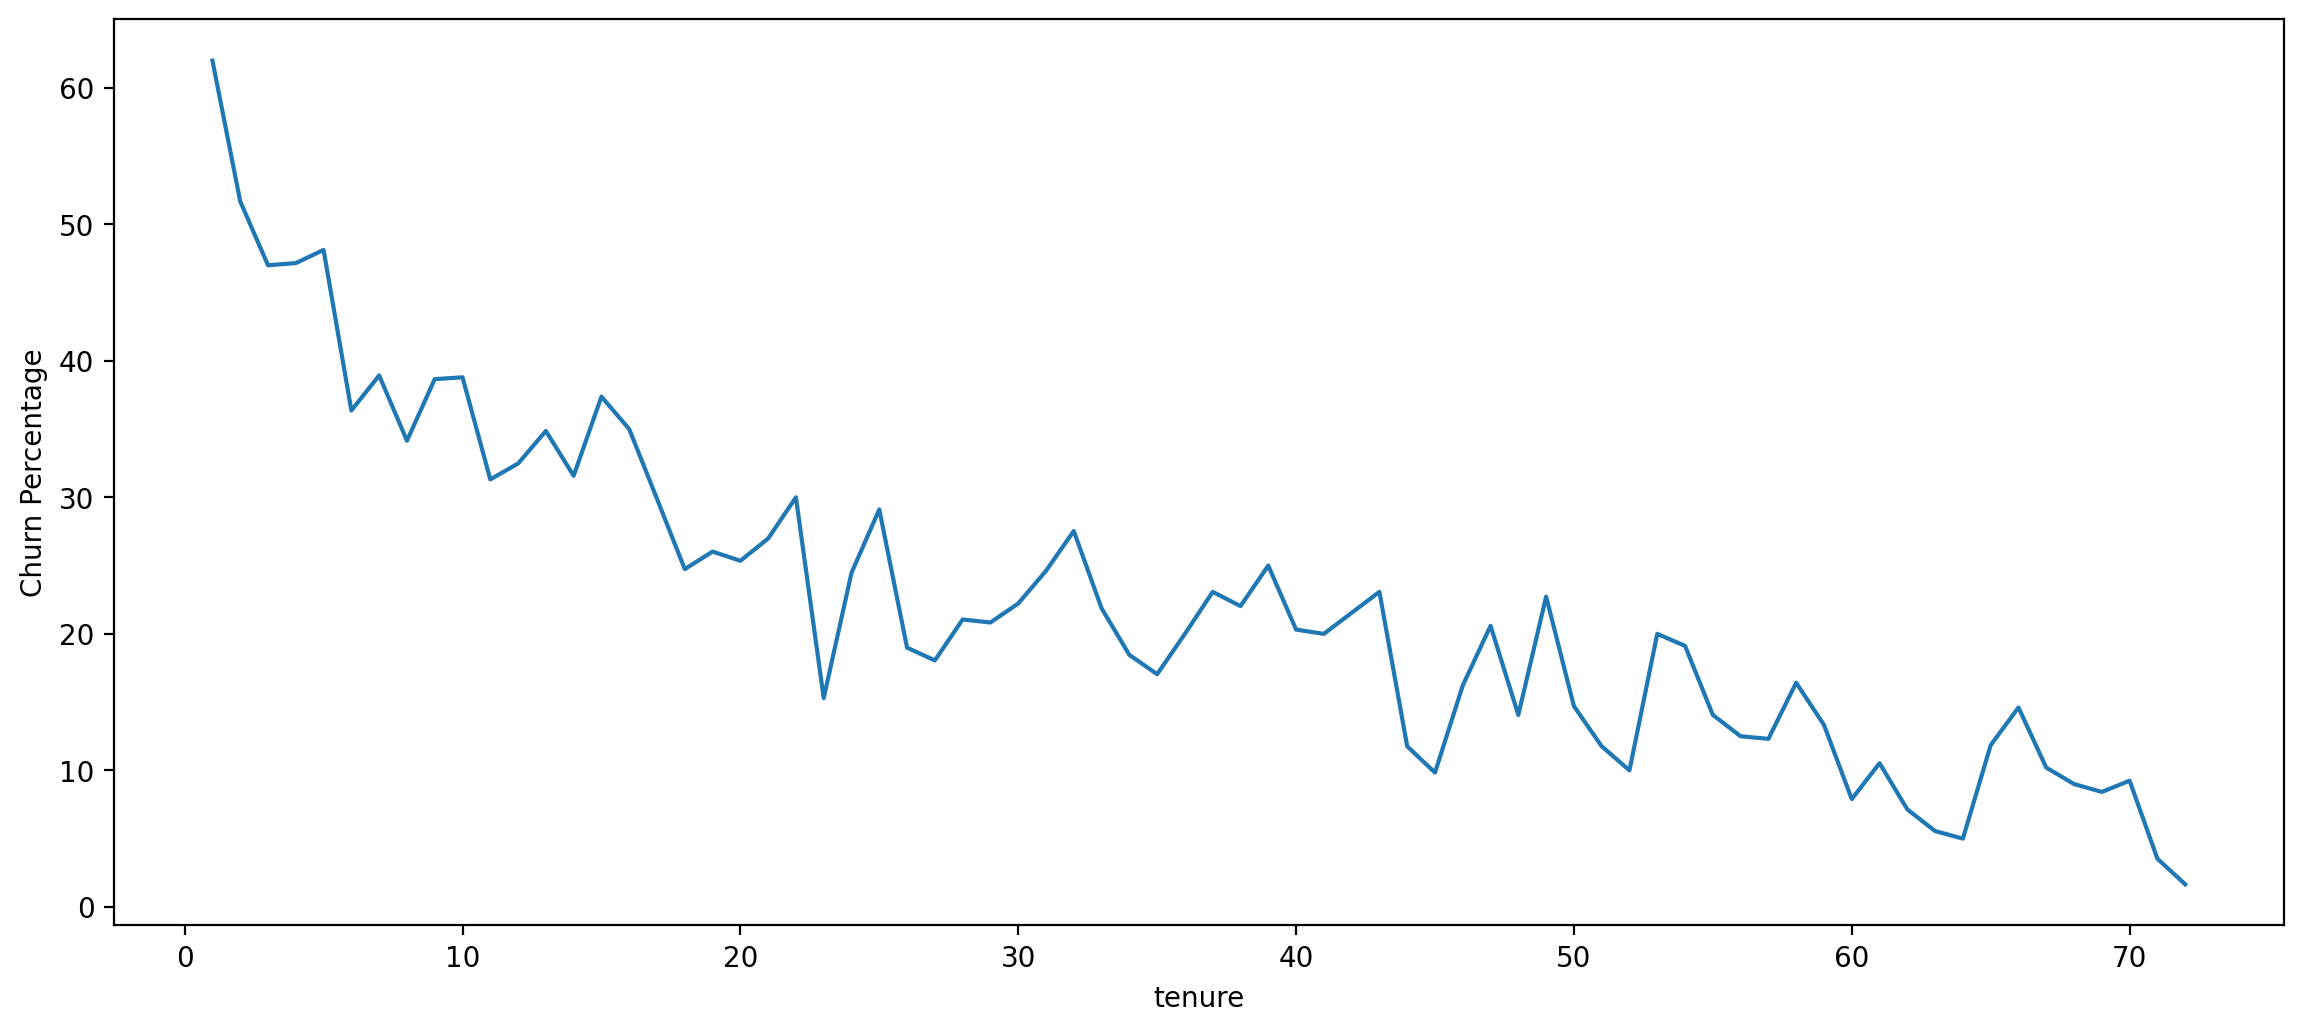

In [47]:
plt.figure(figsize=(14,6), dpi=200)
sns.lineplot(data=churn_rate, x=churn_rate.index, y=churn_rate.values)
plt.ylabel('Churn Percentage')

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [49]:
# CODE HERE

In [50]:
def cohort_group(tenure):
    if tenure <= 12:
        return '0-12 Months'
    elif tenure <= 24:
        return '12-24 Months'
    elif tenure <= 48:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [51]:
df['tenure'].apply(cohort_group)

0          0-12 Months
1         24-48 Months
2          0-12 Months
3         24-48 Months
4          0-12 Months
             ...      
7027      12-24 Months
7028    Over 48 Months
7029       0-12 Months
7030       0-12 Months
7031    Over 48 Months
Name: tenure, Length: 7032, dtype: object

In [52]:
df['Tenure Cohort'] = df['tenure'].apply(cohort_group)
df[['tenure', 'Tenure Cohort']].head(10)

tenure   Tenure Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

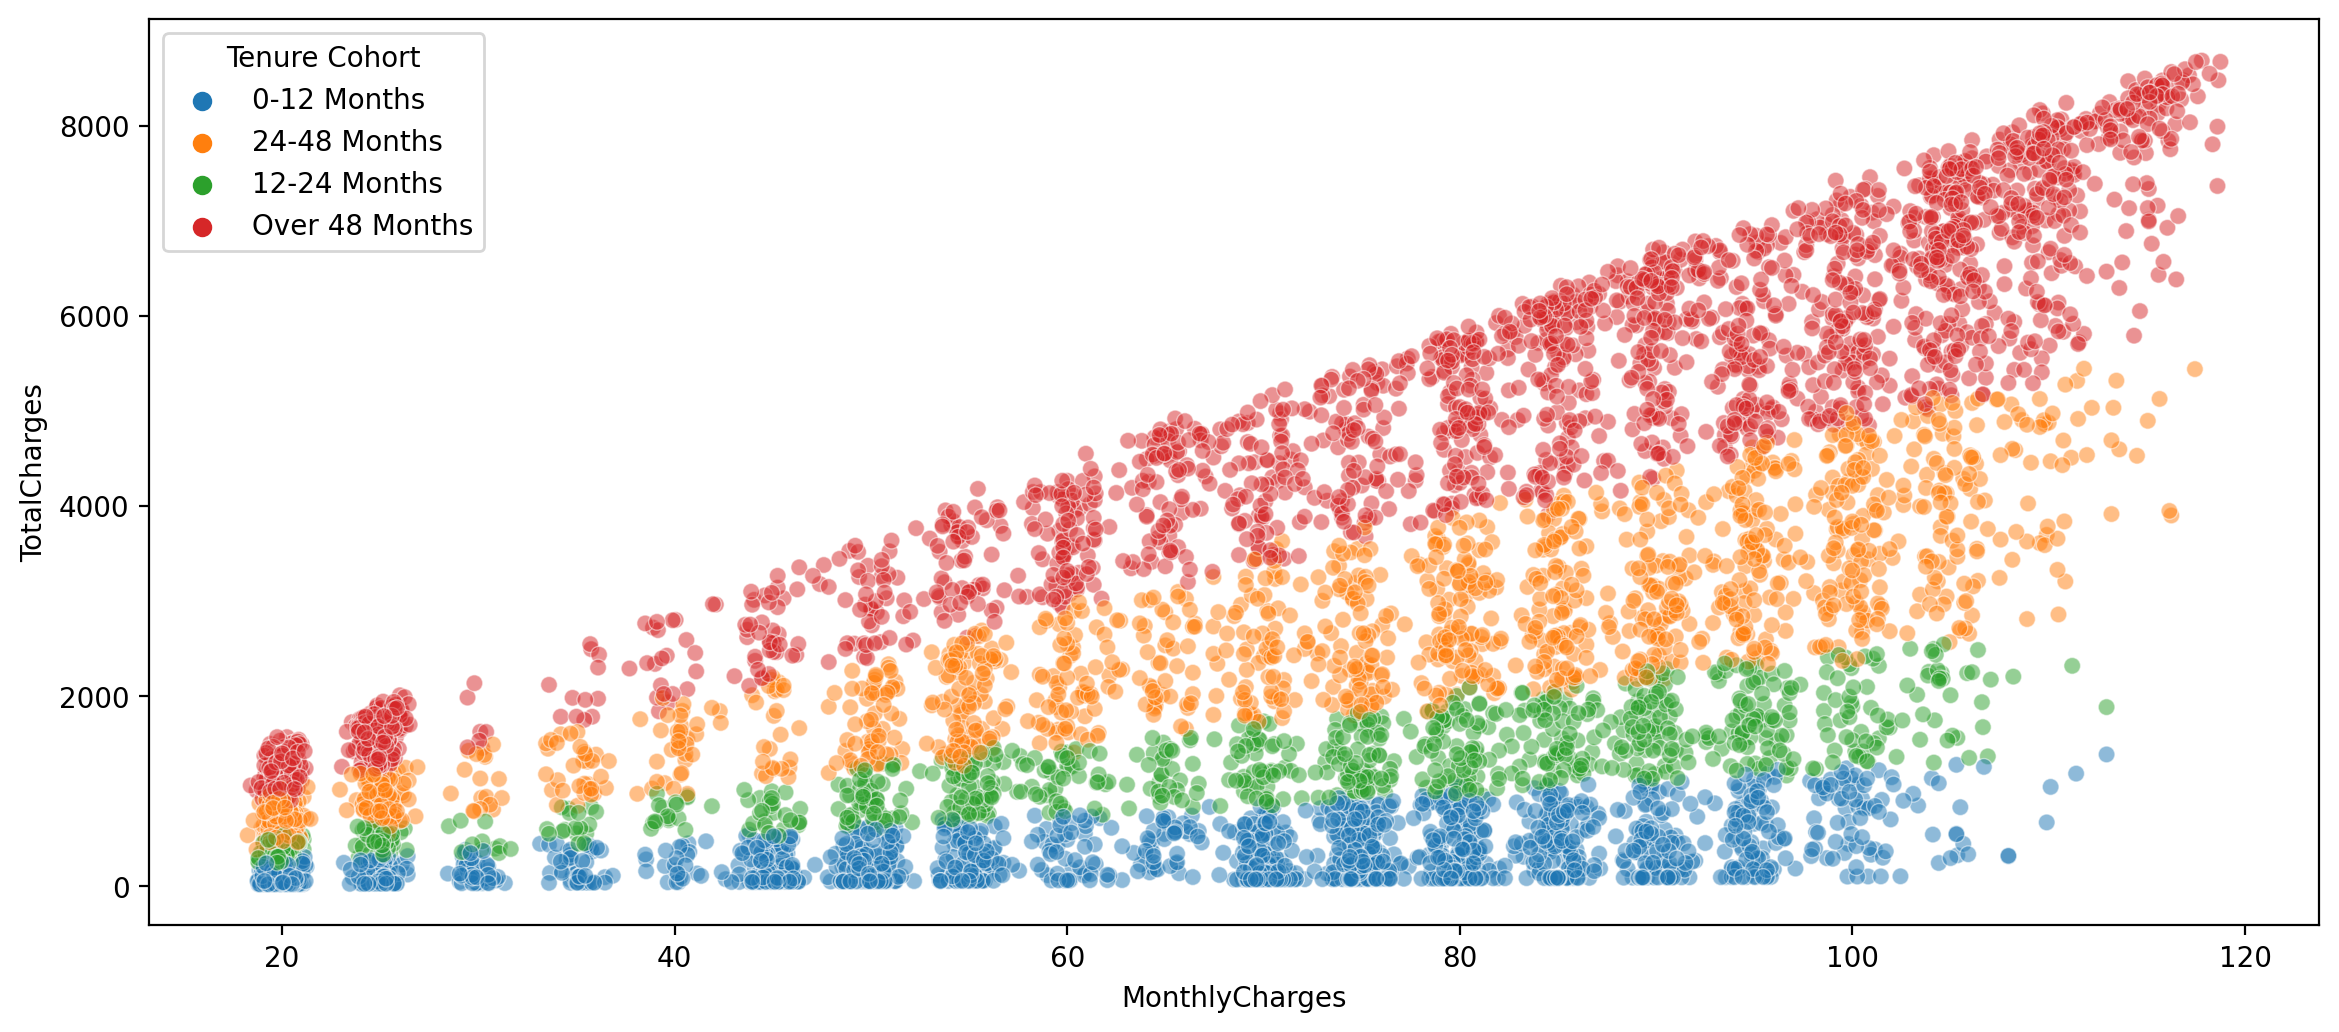

In [55]:
plt.figure(figsize=(14,6), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.5)

**TASK: Create a count plot showing the churn count per cohort.**

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

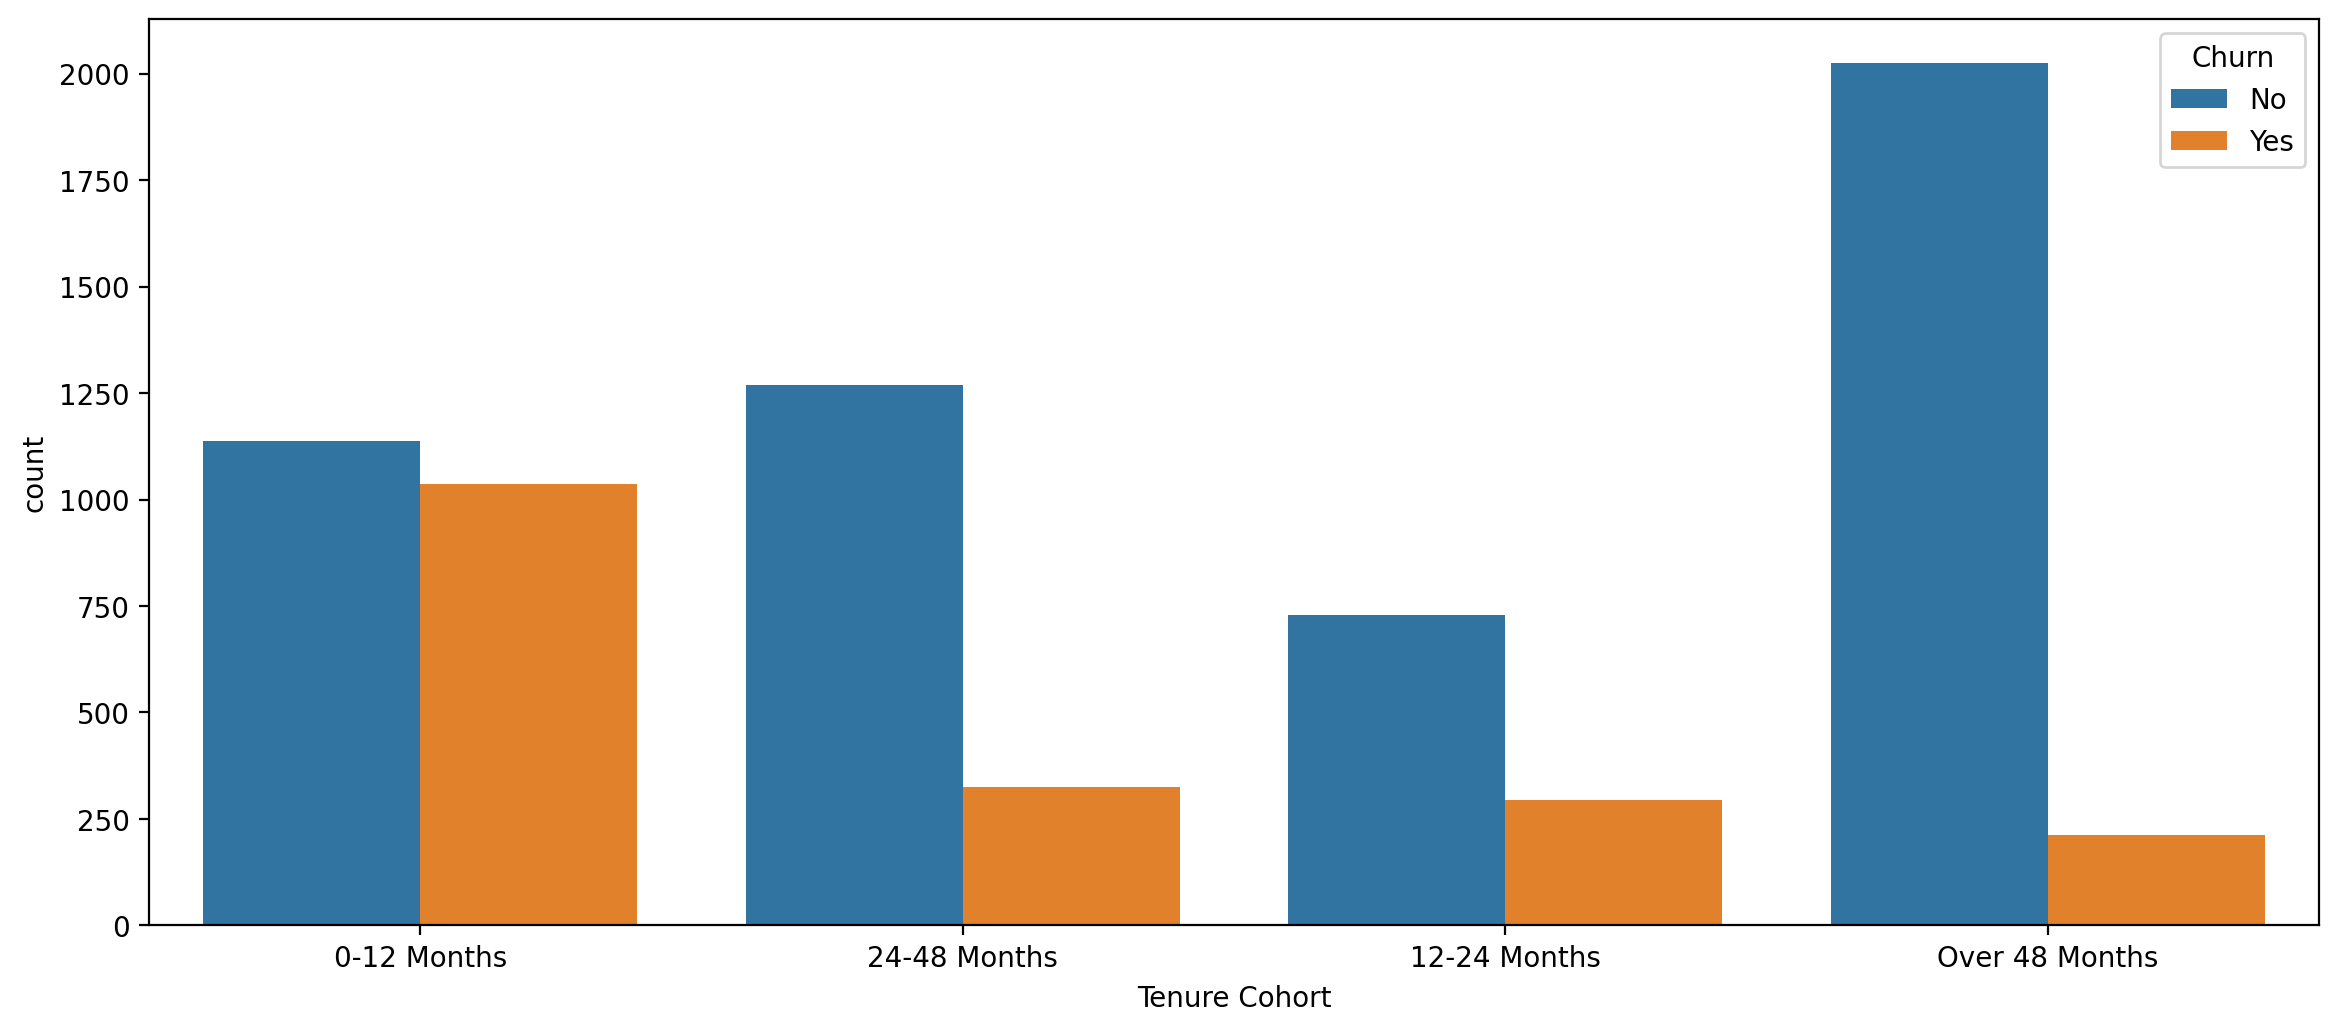

In [58]:
plt.figure(figsize=(14,6), dpi=200)
sns.countplot(x=df['Tenure Cohort'], hue='Churn', data=df)

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

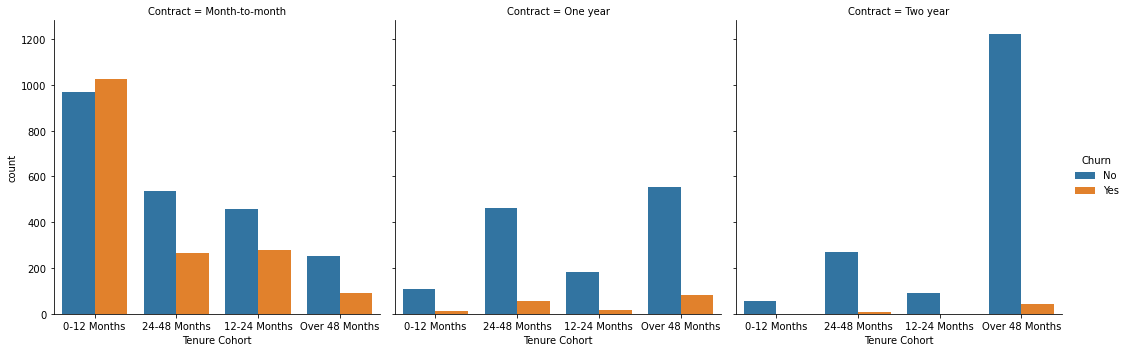

In [61]:
sns.catplot(data=df, x='Tenure Cohort', col='Contract', hue='Churn', kind='count')

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [63]:
## Go through 4 model

# 1. Decision Tree, 
# 2. Random Forest
# 3. AdaBoost
# 4. Gradient Boosting

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error

In [65]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  Tenure Cohort  
0           Electronic check          29.85        29.85     No    0-12 Months  
1               Mailed check          56.95      1889.50     No   24-48 Months  
2               Mailed check          53.85       108.15    Yes    0-12 Months  
3  Bank transfer (automatic)          42.30      1840.75     No   24-48 Months  
4           Electronic check          70.70       151.65    Yes    0-12 Months  

[5 rows x 22 columns]

In [66]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure Cohort'],
      dtype='object')

In [67]:
X = df.drop(['customerID','Churn'], axis=1)

In [68]:
X = pd.get_dummies(X, drop_first= True)
X.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85            0   
1              0      34           56.95       1889.50            1   
2              0       2           53.85        108.15            1   
3              0      45           42.30       1840.75            1   
4              0       2           70.70        151.65            0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            1               0                 0   
1            0               0                 1   
2            0               0                 1   
3            0               0                 0   
4            0               0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                               1                  0  ...   
1                               0                  0  ...   
2                               0                  0  ...   
3                               1                  0  ...   
4                               0                  0  ...   

   StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                    0                  0                  0   
1                    0                  1                  0   
2                    0                  0                  0   
3                    0                  1                  0   
4                    0                  0                  0   

   PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                     1                                      0   
1                     0                                      0   
2                     1                                      0   
3                     0                                      0   
4                     1                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                               1                           0   
1                               0                           1   
2                               0                           1   
3                               0                           0   
4                               1                           0   

   Tenure Cohort_12-24 Months  Tenure Cohort_24-48 Months  \
0                           0                           0   
1                           0                           1   
2                           0                           0   
3                           0                           1   
4                           0                           0   

   Tenure Cohort_Over 48 Months  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 33 columns]

In [69]:
y = df['Churn']

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
tree_model = DecisionTreeClassifier(max_depth=6)

In [74]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [75]:
tree_predict = tree_model.predict(X_test)

In [76]:
print(classification_report(y_test, tree_predict))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



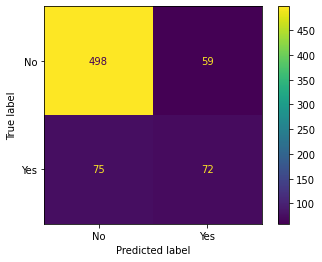

In [78]:
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test)

In [80]:
feat_imp = tree_model.feature_importances_
feat_imp = pd.DataFrame(feat_imp, columns=['Feature Importance'], index=X.columns).sort_values(by='Feature Importance')
feat_imp[feat_imp['Feature Importance']>0.]

Feature Importance
PhoneService_Yes                           0.000890
gender_Male                                0.001237
OnlineBackup_Yes                           0.005341
MultipleLines_No phone service             0.006962
TechSupport_Yes                            0.007868
OnlineSecurity_Yes                         0.008376
Contract_One year                          0.010021
MultipleLines_Yes                          0.012432
SeniorCitizen                              0.012680
StreamingTV_No internet service            0.026290
Contract_Two year                          0.027065
PaymentMethod_Electronic check             0.034436
MonthlyCharges                             0.042293
TotalCharges                               0.066135
InternetService_Fiber optic                0.314060
tenure                                     0.423914

Text(0.5, 1.0, 'Feature Importance for Decision Tree')

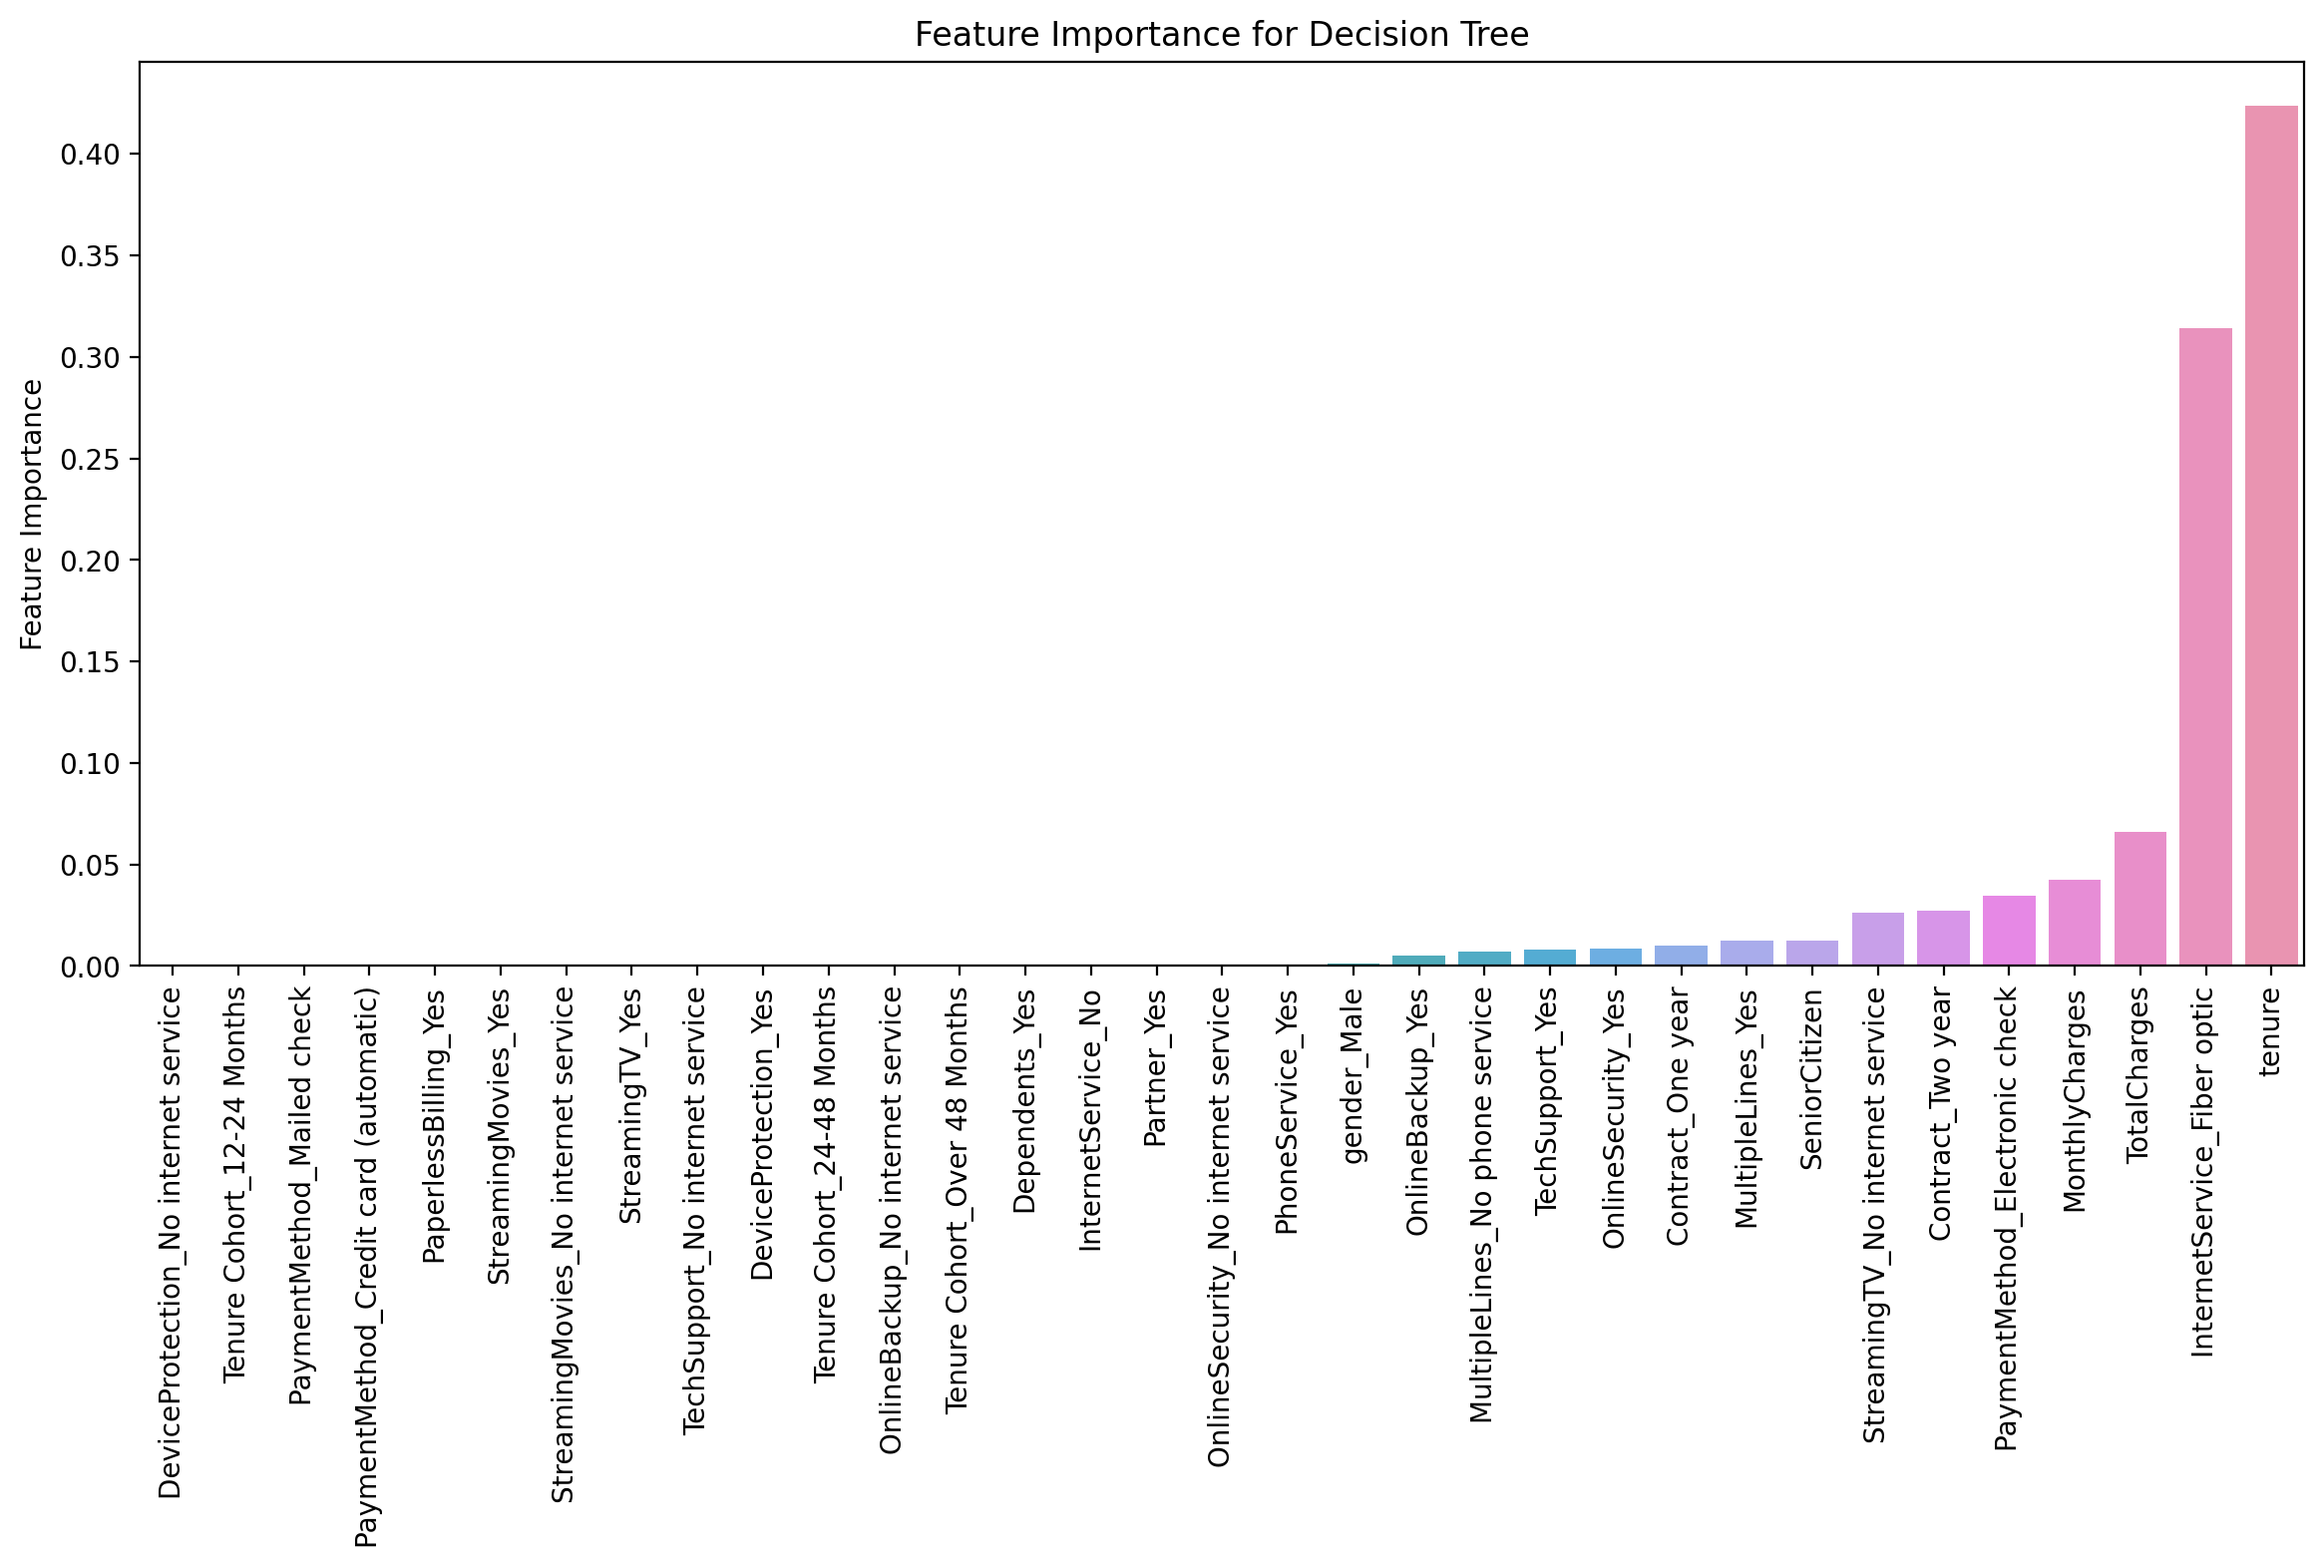

In [81]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=feat_imp, x=feat_imp.index, y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree")

In [83]:
from sklearn.tree import plot_tree

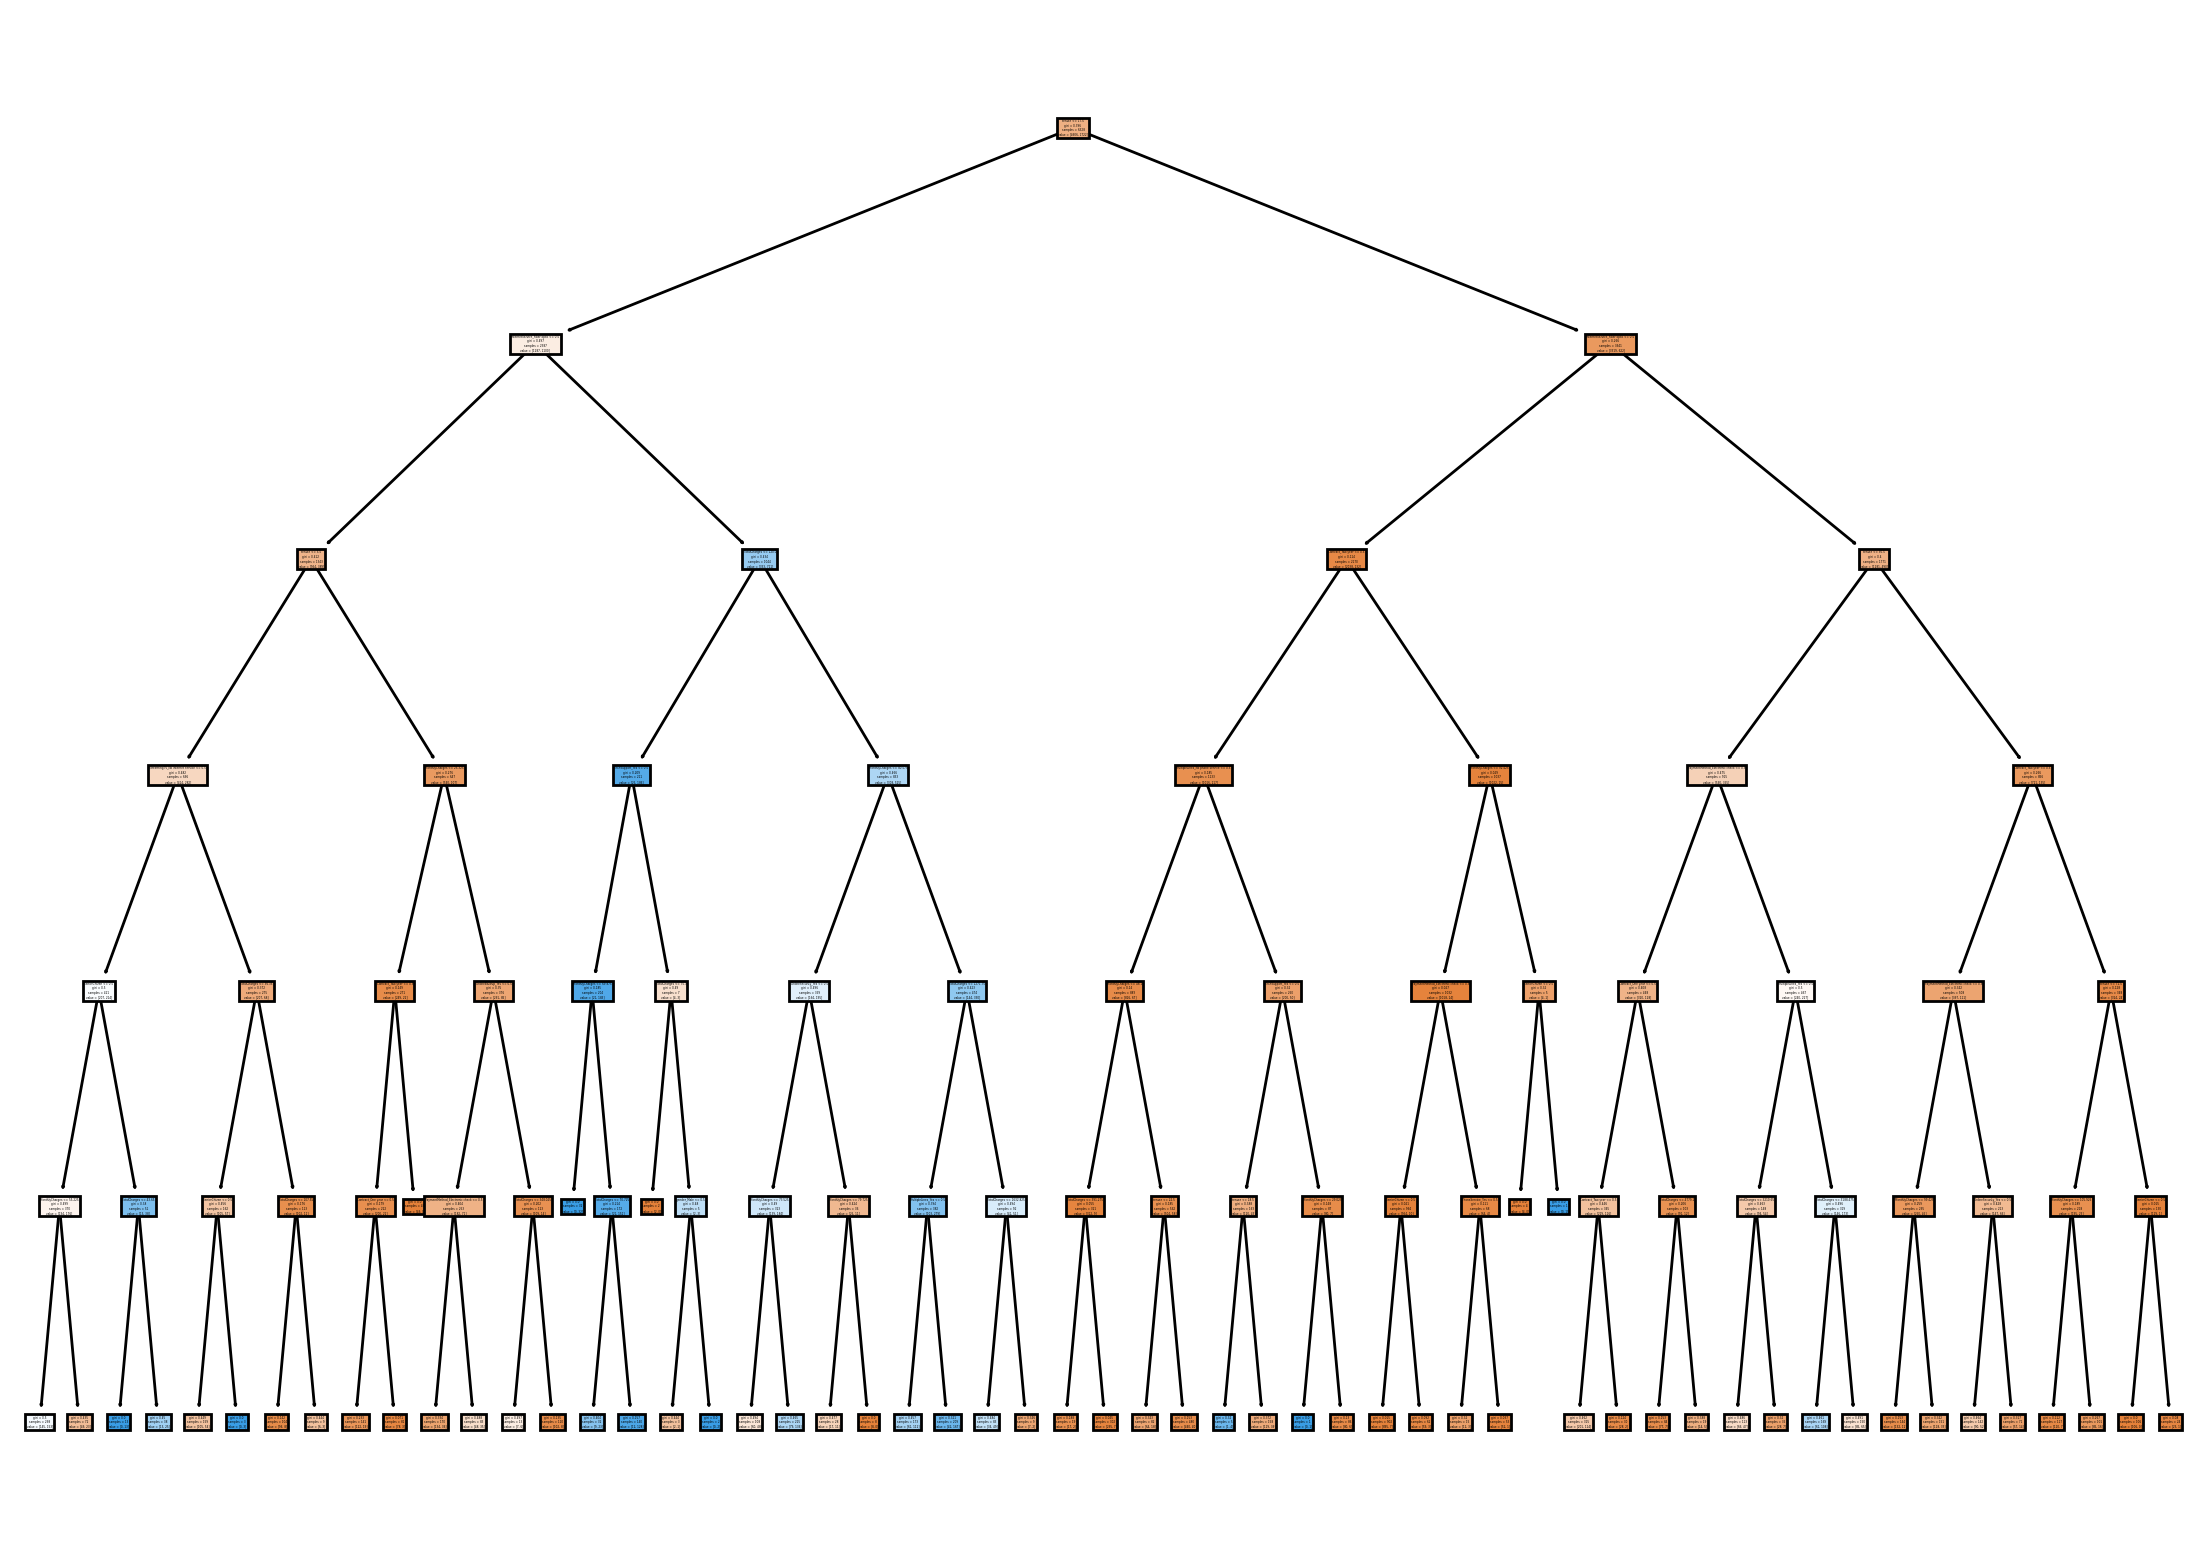

In [84]:
plt.figure(figsize=(14,10), dpi=200)
plot_tree(tree_model,feature_names=X.columns, filled=True);

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rfc_model = RandomForestClassifier(max_depth=6)

In [111]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [112]:
rfc_pred = rfc_model.predict(X_test)

In [113]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

          No       0.86      0.93      0.89       557
         Yes       0.61      0.43      0.50       147

    accuracy                           0.82       704
   macro avg       0.74      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



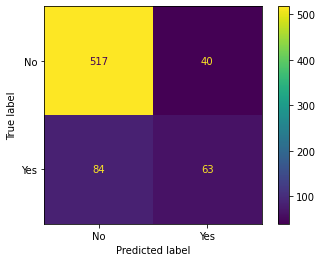

In [114]:
ConfusionMatrixDisplay.from_estimator(rfc_model, X_test, y_test)

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [115]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [128]:
ada_model = AdaBoostClassifier(n_estimators=100)

In [129]:
gb_model = GradientBoostingClassifier()

In [130]:
param_grid = {'n_estimators':[50,100],
             'learning_rate':[0.1, 0.05, 0.2],
             'max_depth':[3,4,5]}

In [131]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [132]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [133]:
ada_pred = ada_model.predict(X_test)

In [134]:
gb_pred = grid.predict(X_test)

In [135]:
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



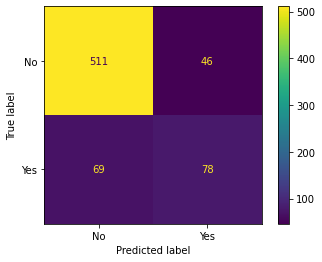

In [136]:
ConfusionMatrixDisplay.from_estimator(ada_model, X_test, y_test)

In [137]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.60      0.50      0.54       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.72       704
weighted avg       0.82      0.83      0.82       704



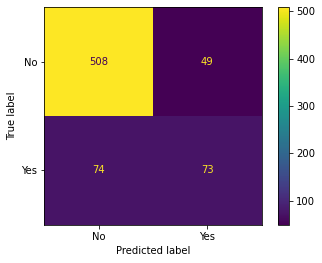

In [138]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

**TASK: Analyze your results, which model performed best for you?**

In [103]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.